In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
import os
import random
import shutil
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [5]:
base_dir = '/content/drive/MyDrive/capstone'
data_dir = '/content/drive/MyDrive/capstone/cocoa_diseases'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

In [6]:
folder_path = '/content/drive/MyDrive/capstone/cocoa_diseases/black_pod_rot'
item = os.listdir(folder_path)
count = len(item)

print(f"Jumlah isi dalam folder: {count}")

Jumlah isi dalam folder: 500


In [7]:
folder_path = '/content/drive/MyDrive/capstone/cocoa_diseases/pod_borer'
item = os.listdir(folder_path)
count = len(item)

print(f"Jumlah isi dalam folder: {count}")

Jumlah isi dalam folder: 208


In [8]:
folder_path = '/content/drive/MyDrive/capstone/cocoa_diseases/healthy'
item = os.listdir(folder_path)
count = len(item)

print(f"Jumlah isi dalam folder: {count}")

Jumlah isi dalam folder: 500


In [8]:
# Define the class names
class_names = ['black_pod_rot', 'healthy', 'pod_borer']

# Define the desired split ratios (adjust as needed)
train_ratio = 0.8  # 70% for training
test_ratio = 0.1   # 20% for testing
valid_ratio = 0.1  # 10% for validation

# Iterate over each class directory
for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    images = os.listdir(class_dir)
    random.shuffle(images)
    total_images = len(images)

    # Split the images into train, test, and validation sets
    train_split = int(train_ratio * total_images)
    test_split = int((train_ratio + test_ratio) * total_images)

    train_images = images[:train_split]
    test_images = images[train_split:test_split]
    valid_images = images[test_split:]

    # Move images to respective directories
    for image in train_images:
        src_path = os.path.join(class_dir, image)
        dst_path = os.path.join(train_dir, class_name, image)
        os.makedirs(os.path.dirname(dst_path), exist_ok=True)
        shutil.copy(src_path, dst_path)

    for image in test_images:
        src_path = os.path.join(class_dir, image)
        dst_path = os.path.join(test_dir, class_name, image)
        os.makedirs(os.path.dirname(dst_path), exist_ok=True)
        shutil.copy(src_path, dst_path)

    for image in valid_images:
        src_path = os.path.join(class_dir, image)
        dst_path = os.path.join(validation_dir, class_name, image)
        os.makedirs(os.path.dirname(dst_path), exist_ok=True)
        shutil.copy(src_path, dst_path)

print("Data splitting completed successfully!")

Data splitting completed successfully!


In [9]:
print(len(os.listdir(data_dir)))
print(len(os.listdir(train_dir)))
print(len(os.listdir(test_dir)))
print(len(os.listdir(validation_dir)))

3
3
3
3


In [32]:
# Function to count the number of files in a directory
def count_files(directory):
    count = sum([len(files) for r, d, files in os.walk(directory)])
    return count

# Count the number of files in each directory
data_count = count_files(data_dir)
train_count = count_files(train_dir)
test_count = count_files(test_dir)
valid_count = count_files(validation_dir)

# Print the results
print("Total data count:", data_count)
print("Train data count:", train_count)
print("Test data count:", test_count)
print("Validation data count:", valid_count)

Total data count: 1208
Train data count: 1205
Test data count: 416
Validation data count: 371


In [10]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

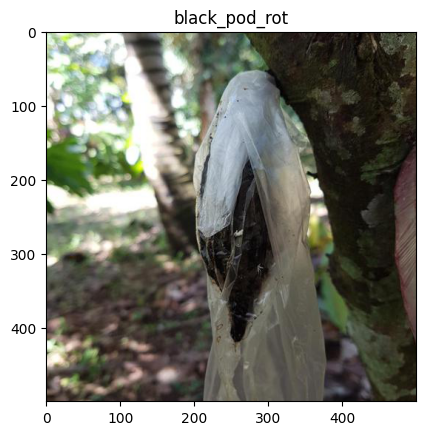

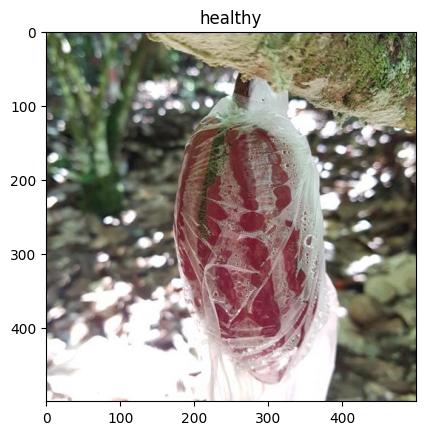

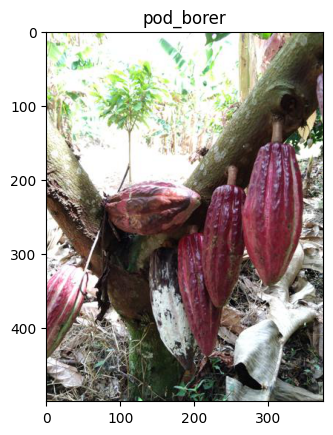

In [12]:
sample_images = 1

for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        image_list = os.listdir(class_path)
        random.shuffle(image_list)  # Shuffle the list of images
        sample_list = image_list[:sample_images]  # Select a sample of images

        for image_name in sample_list:
            image_path = os.path.join(class_path, image_name)
            # Load and display the image
            image = Image.open(image_path)
            plt.imshow(image)
            plt.title(class_name)
            plt.show()

In [23]:
image_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
)

Found 1205 images belonging to 3 classes.
Found 416 images belonging to 3 classes.
Found 371 images belonging to 3 classes.


In [24]:
class_labels = train_generator.class_indices
print(class_labels)

{'black_pod_rot': 0, 'healthy': 1, 'pod_borer': 2}


In [30]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 52, 52, 64)        36928     
                                                                 
 flatten_4 (Flatten)         (None, 173056)           

In [31]:
epochs = 50
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

Epoch 1/50
38/38 [==============================] - 140s 4s/step - loss: 1.0532 - accuracy: 0.4166 - val_loss: 0.9813 - val_accuracy: 0.5364
Epoch 2/50
38/38 [==============================] - 95s 3s/step - loss: 0.9798 - accuracy: 0.4515 - val_loss: 0.8868 - val_accuracy: 0.5633
Epoch 3/50
38/38 [==============================] - 98s 3s/step - loss: 0.9160 - accuracy: 0.5461 - val_loss: 0.9493 - val_accuracy: 0.4582
Epoch 4/50
38/38 [==============================] - 97s 3s/step - loss: 0.8557 - accuracy: 0.5809 - val_loss: 0.7791 - val_accuracy: 0.6415
Epoch 5/50
38/38 [==============================] - 97s 3s/step - loss: 0.8257 - accuracy: 0.6191 - val_loss: 0.7213 - val_accuracy: 0.6819
Epoch 6/50
38/38 [==============================] - 95s 3s/step - loss: 0.8223 - accuracy: 0.6141 - val_loss: 0.8292 - val_accuracy: 0.6307
Epoch 7/50
38/38 [==============================] - 102s 3s/step - loss: 0.8012 - accuracy: 0.6357 - val_loss: 0.8411 - val_accuracy: 0.6173
Epoch 8/50
38/38 [

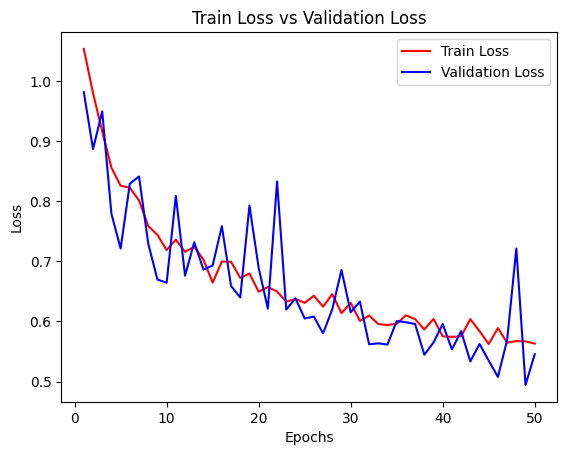

In [33]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot train loss dan validation loss
plt.plot(epochs, train_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Train Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

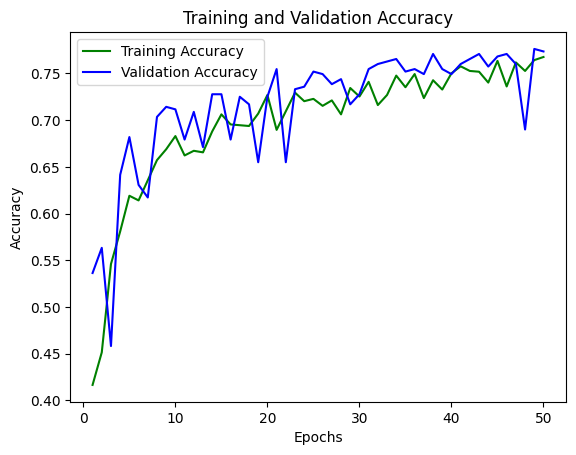

In [34]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'g', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [41]:
# Evaluasi model
val_loss, val_acc = model.evaluate(validation_generator)
print('Validation Loss: ',val_loss),
print('Validation Accuracy: ',val_acc)

12/12 [==============================] - 16s 1s/step - loss: 0.5456 - accuracy: 0.7736
Validation Loss:  0.5455924272537231
Validation Accuracy:  0.7735849022865295
